<a href="https://colab.research.google.com/github/lenkaakhila/lenkaakhila/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load datasets
ratings = pd.read_csv('/content/zee-ratings.dat', sep='::', engine='python',
                      names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
users = pd.read_csv('/content/zee-users.dat', sep='::', engine='python',
                    names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])
movies = pd.read_csv('/content/zee-movies.dat', sep='::', engine='python',
                     names=['MovieID', 'Title', 'Genres'], encoding='ISO-8859-1')


# Merge all data
data = ratings.merge(users, on='UserID').merge(movies, on='MovieID')
data['Rating'] = data['Rating'].astype(int)
data['Year'] = data['Title'].str.extract(r'\((\d{4})\)', expand=False).astype('Int64')


In [4]:
# Age Distribution
age_map = {1:"<18", 18:"18-24", 25:"25-34", 35:"35-44", 45:"45-49", 50:"50-55", 56:"56+"}
data['AgeGroup'] = data['Age'].map(age_map)

# Ratings per age group
age_rating_counts = data.groupby('AgeGroup')['Rating'].count().sort_values(ascending=False)
occupation_rating_counts = data.groupby('Occupation')['Rating'].count().sort_values(ascending=False)

# Top decades
data['Decade'] = (data['Year'] // 10) * 10

# Popular Movies
movie_stats = data.groupby('Title').agg({'Rating': ['count', 'mean']})
movie_stats.columns = ['RatingCount', 'AvgRating']
top_movie = movie_stats['RatingCount'].idxmax()


In [5]:
# Create pivot table
pivot_table = data.pivot_table(index='UserID', columns='Title', values='Rating')
target_movie = 'Liar Liar (1997)'
similar_movies = pivot_table.corrwith(pivot_table[target_movie])
similar_df = pd.DataFrame(similar_movies, columns=['PearsonCorr']).dropna()
similar_df = similar_df.sort_values('PearsonCorr', ascending=False).head(6)


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [6]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

movie_user_matrix = pivot_table.fillna(0).T
csr_data = csr_matrix(movie_user_matrix.values)
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(csr_data)

# Recommend similar movies
def get_movie_recommendations(movie_title):
    movie_idx = movie_user_matrix.index.tolist().index(movie_title)
    distances, indices = knn.kneighbors(movie_user_matrix.iloc[movie_idx, :].values.reshape(1, -1), n_neighbors=6)
    return movie_user_matrix.index[indices.flatten()[1:]]

get_movie_recommendations("Liar Liar (1997)")


Index(['Mrs. Doubtfire (1993)', 'Ace Ventura: Pet Detective (1994)',
       'Dumb & Dumber (1994)', 'Home Alone (1990)', 'Wayne's World (1992)'],
      dtype='object', name='Title')

In [9]:
!pip install --force-reinstall --no-cache-dir numpy scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 9.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 119.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 232.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 310.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 219.1 MB/s eta 0:00:00
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2469551 sha256=e78d350f2f3aac12d65069006223242625c6524482a86b749a2c567d0e501376
  Stored in directory: /tmp/pip-ephem-wheel-cache-e2jarp47/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise
  Attempting uninstall: numpy
    Found

In [2]:
!pip install lightfm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lightfm: filename=lightfm-1.17-cp311-cp311-linux_x86_64.whl size=831128 sha256=8fe3936cb50626a7d0a0206c4de834c66aa2dd75da7718b4d58dad752cfd6ac4
  Stored in directory: /root/.cache/pip/wheels/b9/0d/8a/0729d2e6e3ca2a898ba55201f905da7db3f838a33df5b3fcdd
Successfully built lightfm


In [4]:
import pandas as pd

ratings = pd.read_csv('/content/zee-ratings.dat', sep='::', engine='python',
                      names=['UserID', 'MovieID', 'Rating', 'Timestamp'],
                      encoding='ISO-8859-1')



In [9]:
# Check unique values in the Rating column
print(ratings['Rating'].unique()[:10])  # just to inspect

# Drop rows where 'Rating' column contains non-numeric entries (like 'Rating')
ratings = ratings[ratings['Rating'] != 'Rating']

# Convert to float
ratings['Rating'] = ratings['Rating'].astype(float)

 #Setup dataset
dataset = Dataset()
dataset.fit(ratings['UserID'], ratings['MovieID'])

# Build interactions
(interactions, weights) = dataset.build_interactions(
    [(x.UserID, x.MovieID, x.Rating) for x in ratings.itertuples()]
)

# Train model
model = LightFM(no_components=4, loss='warp')
model.fit(interactions, epochs=10, num_threads=2)


[5. 3. 4. 2. 1.]


In [10]:
import pandas as pd

# Load data
ratings = pd.read_csv('/content/zee-ratings.dat', sep='::', engine='python',
                      names=['UserID', 'MovieID', 'Rating', 'Timestamp'],
                      encoding='ISO-8859-1', header=None)

# Drop erroneous rows
ratings = ratings[ratings['Rating'] != 'Rating']

# Convert to correct datatype
ratings['UserID'] = ratings['UserID'].astype(int)
ratings['MovieID'] = ratings['MovieID'].astype(int)
ratings['Rating'] = ratings['Rating'].astype(float)


/tmp/ipython-input-10-4041570417.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['UserID'] = ratings['UserID'].astype(int)


In [11]:
from lightfm import LightFM
from lightfm.data import Dataset

# Step 1: Prepare dataset
dataset = Dataset()
dataset.fit(ratings['UserID'], ratings['MovieID'])

# Step 2: Create interaction matrix
(interactions, weights) = dataset.build_interactions(
    [(x.UserID, x.MovieID, x.Rating) for x in ratings.itertuples()]
)

# Step 3: Train MF model (WARP loss optimizes ranking)
model = LightFM(no_components=4, loss='warp')
model.fit(interactions, epochs=10, num_threads=2)


In [12]:
import numpy as np

# Get reverse mappings
user_id_map, user_feature_map, item_id_map, item_feature_map = dataset.mapping()
inv_item_map = {v: k for k, v in item_id_map.items()}

def recommend_movies(user_id, model, interactions, dataset, n=5):
    n_users, n_items = interactions.shape
    user_index = user_id_map[user_id]  # map to internal index

    # Predict scores for all items
    scores = model.predict(user_index, np.arange(n_items))
    top_items = np.argsort(-scores)[:n]

    return [inv_item_map[i] for i in top_items]


In [13]:
# Load movies
movies = pd.read_csv('/content/zee-movies.dat', sep='::', engine='python',
                     names=['MovieID', 'Title', 'Genres'], encoding='ISO-8859-1')

# Example: Recommend for user 42
user_recs = recommend_movies(42, model, interactions, dataset)

# Show titles
movies[movies['MovieID'].isin(user_recs)][['MovieID', 'Title']]



,MovieID,Title


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

In [14]:
import matplotlib.pyplot as plt

user_embeddings = model.pu  # (n_users x d)
movie_embeddings = model.qi  # (n_movies x d)

# 2D visualization
plt.scatter(movie_embeddings[:, 0], movie_embeddings[:, 1], alpha=0.5)
plt.title('Movie Embeddings (d=2)')
plt.xlabel('Latent Feature 1')
plt.ylabel('Latent Feature 2')
plt.grid()
plt.show()


AttributeError: 'LightFM' object has no attribute 'pu'

In [15]:
# Get user and item embeddings from LightFM
user_embeddings = model.user_embeddings  # shape: (num_users, no_components)
item_embeddings = model.item_embeddings  # shape: (num_items, no_components)


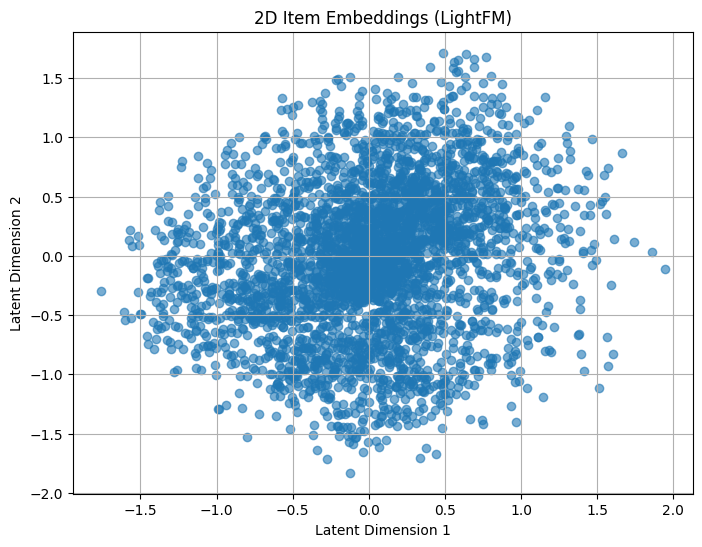

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(item_embeddings[:, 0], item_embeddings[:, 1], alpha=0.6)
plt.title("2D Item Embeddings (LightFM)")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.grid(True)
plt.show()


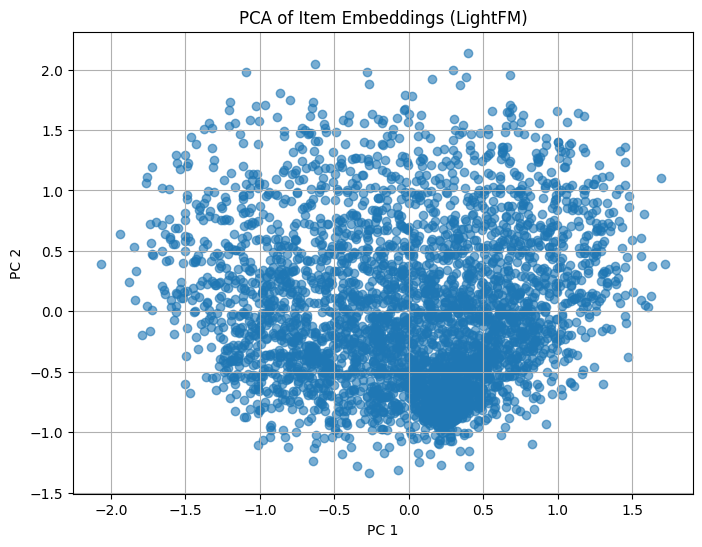

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
item_emb_2d = pca.fit_transform(item_embeddings)

plt.figure(figsize=(8, 6))
plt.scatter(item_emb_2d[:, 0], item_emb_2d[:, 1], alpha=0.6)
plt.title("PCA of Item Embeddings (LightFM)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.show()
